In [14]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os
from tqdm import tqdm

In [15]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = []
    for label in ['NORMAL', 'PNEUMONIA']:
        path = os.path.join(data_dir, label)
        class_num = 1 if label == 'PNEUMONIA' else 0
        for img in tqdm(os.listdir(path)):
            try:
                if not img.endswith('.DS_Store'): # Skip non-image files
                    img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                    resized_arr = cv2.resize(img_arr, (150, 150)) # Resize image to (150, 150)
                    data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error processing {os.path.join(path, img)}: {str(e)}")
    return np.array(data, dtype=object) # Specify dtype as object

In [ ]:
train = get_training_data('chest_xray/train')
test = get_training_data('chest_xray/test')
val = get_training_data('chest_xray/val')

  0%|          | 0/1342 [00:00<?, ?it/s]

100%|██████████| 9/9 [00:00<00:00, 199.08it/s]


[[ 23  18  15 ...  94  98  94]
 [ 23  20  17 ...  93  94  94]
 [ 20  21  19 ...  93  92  93]
 ...
 [ 28  29  27 ...  38  41  39]
 [ 30  29  28 ...  66  64  65]
 [ 40  42  43 ... 101 100 101]]
[[18 22 31 ... 29 29 20]
 [16 27 35 ... 27 28 19]
 [17 27 30 ... 29 22 18]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[ 0  0 12 ... 28 11  0]
 [ 0  0  1 ... 26  0  0]
 [ 0  0  0 ... 27  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  1]
 [ 0  0  0 ...  0  0  2]]
[[41 46 53 ... 19 19 23]
 [37 46 50 ... 22 21 21]
 [36 43 49 ... 21 21 20]
 ...
 [17 14 14 ... 11 11 10]
 [16 18 15 ... 12 12 12]
 [14 16 16 ... 11 11 13]]
[[81 73 61 ... 33 34 26]
 [86 79 78 ... 33 32 27]
 [79 89 87 ... 35 28 20]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
[[110 121 126 ...  73  65  56]
 [ 55  61  70 ...  71  63  53]
 [ 40  49  56 ...  65  61  51]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   

<Axes: xlabel='count'>

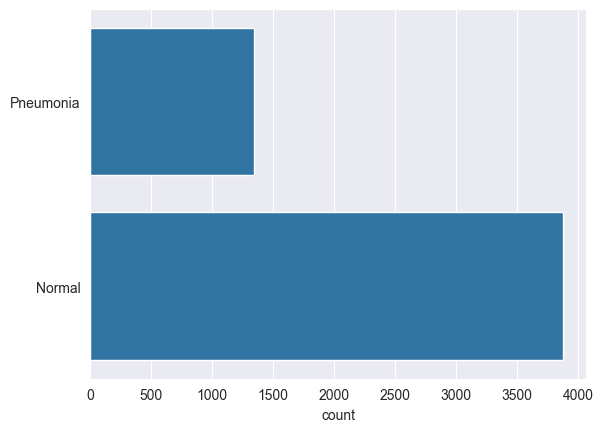

In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)    

Text(0.5, 1.0, 'NORMAL')

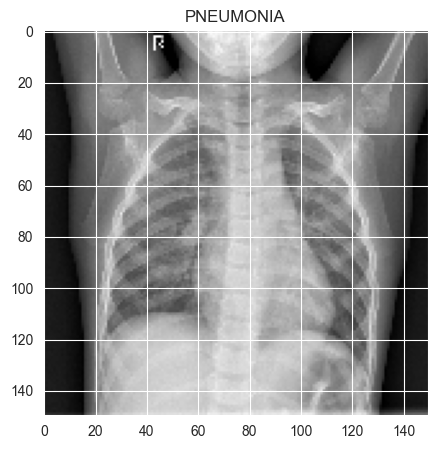

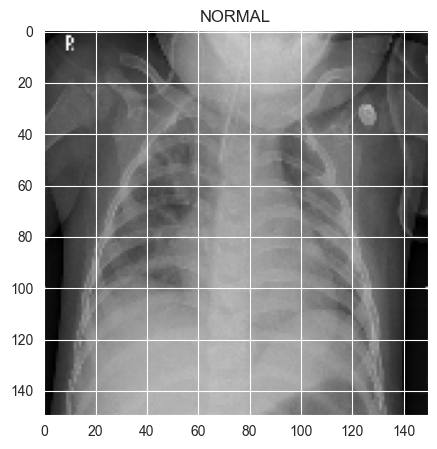

In [30]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])